1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
#lets take a look
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Shape Check
df.shape

(1000, 8)

In [5]:
#Missing Values Check
df.isna().sum()
#No Missings

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#check data type
df.dtypes
#action -- change to strings

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [7]:
#Check Unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.duplicated().sum()
#if there were duplicates and you want to drop'em df.drop_duplicates(inplace=True)

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print(df['gender'].unique())
print(df['lunch'].unique())
print(df['parental_level_of_education'].unique())
print(df['race_ethnicity'].unique())
print(df['test_preparation_course'].unique())

['female' 'male']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']
['none' 'completed']


In [12]:
#Looks like test prep has none values.. lets look at the distribution
print(df['test_preparation_course'].value_counts())
#Only 35.8% of the students have completed the test_prep_course

test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [13]:
#lets look at distribution of rest of the values
print(df['gender'].value_counts())
print(df['lunch'].value_counts())
print(df['parental_level_of_education'].value_counts())
print(df['race_ethnicity'].value_counts())


gender
female    518
male      482
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


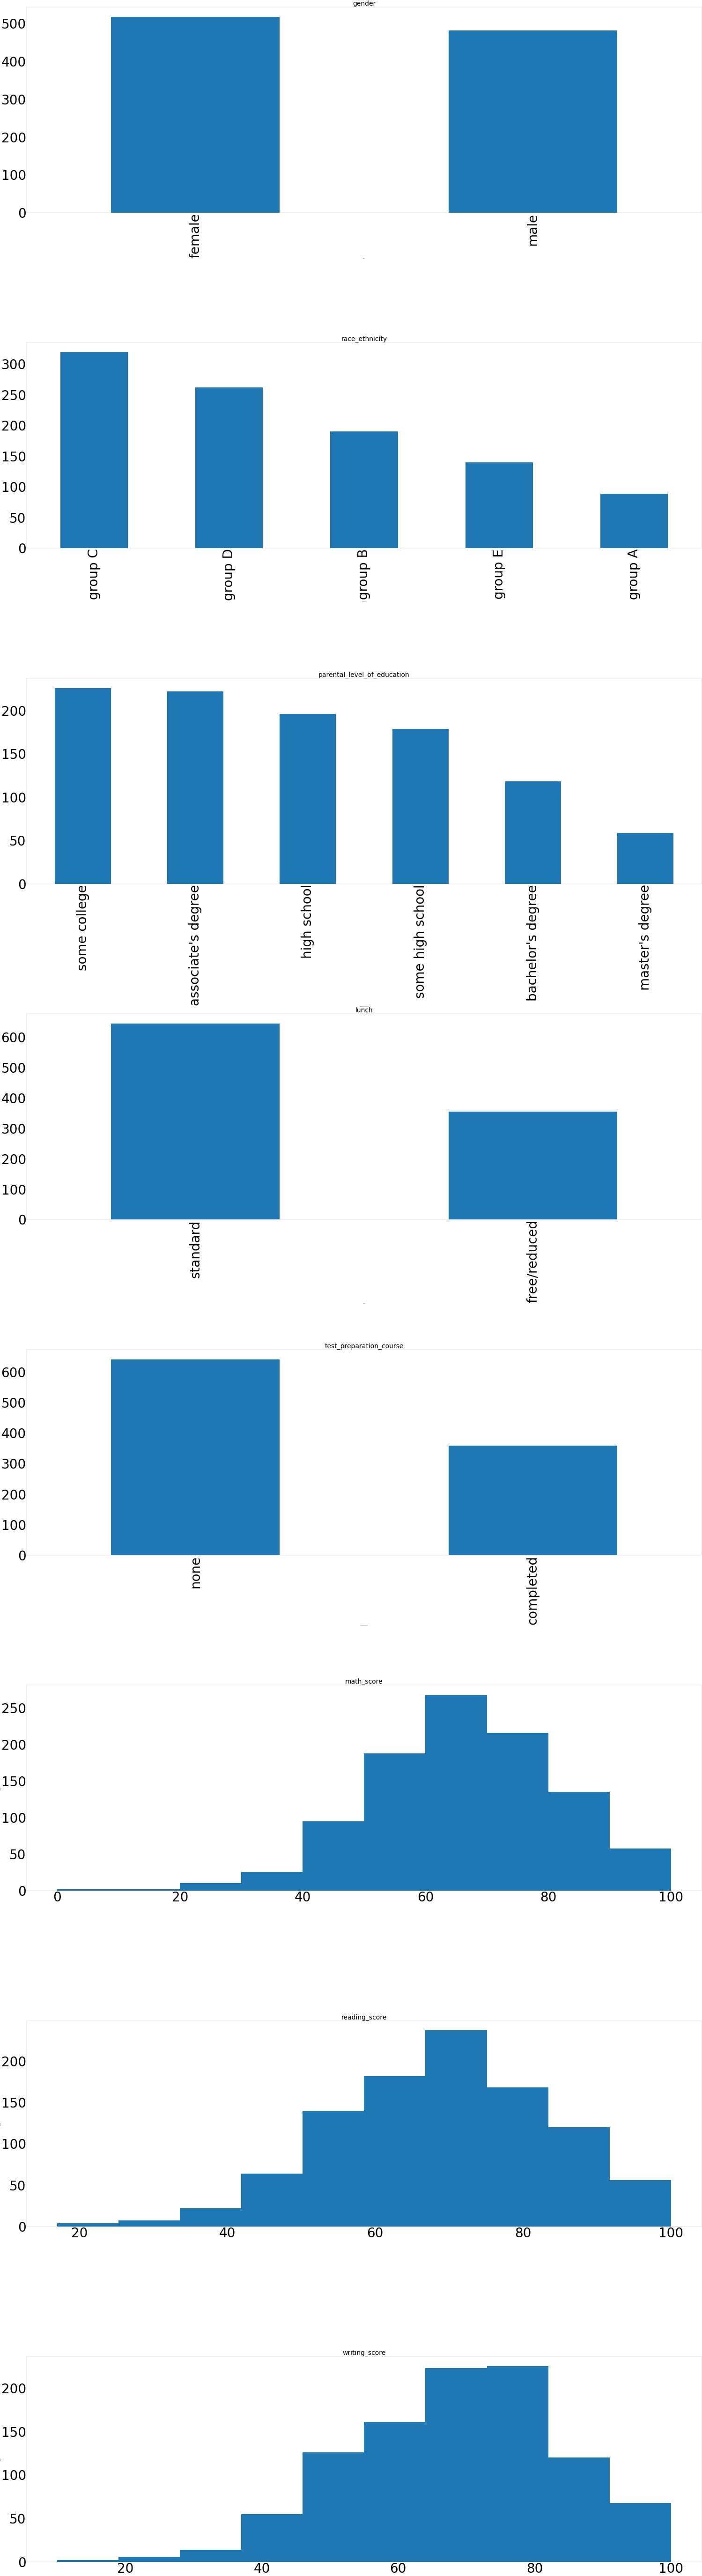

In [14]:
#lets visualize Distribution
def ColumnDistribution(input_df):
    size = math.ceil(input_df.shape[1]**(1/2))
    fig = plt.figure(num = None, figsize = (150,550), 
                     dpi = 10, facecolor = 'w', edgecolor = 'k', clear=True)
    for i, col in enumerate(input_df.columns):
        fig.add_subplot(input_df.shape[1],1, i + 1)
        if input_df[col].dtype == 'object':
            input_df[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=90, fontsize=200).title.set_size(100)
        else:
            input_df[col].plot(kind="hist", ax=plt.gca(), title=col, rot=0, fontsize=200).title.set_size(100)
    fig.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    fig.update
ColumnDistribution(df)

In [25]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [35]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = round(df['total_score']/3,2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


<Axes: xlabel='average_score', ylabel='Count'>

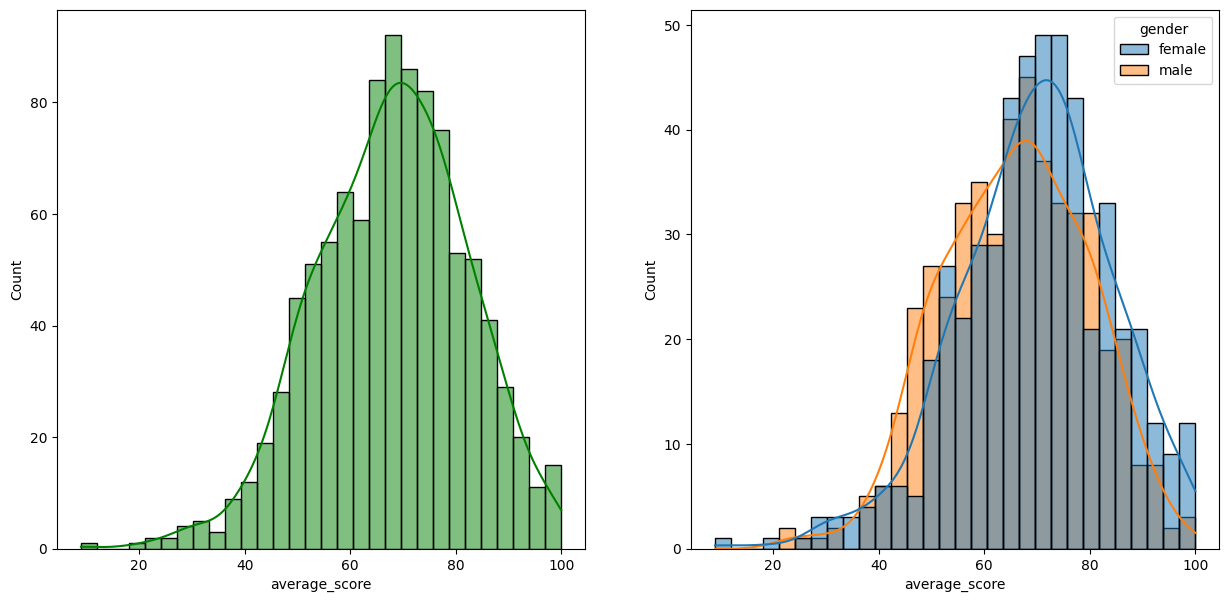

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'average_score', bins=30, kde=True, color='g', hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

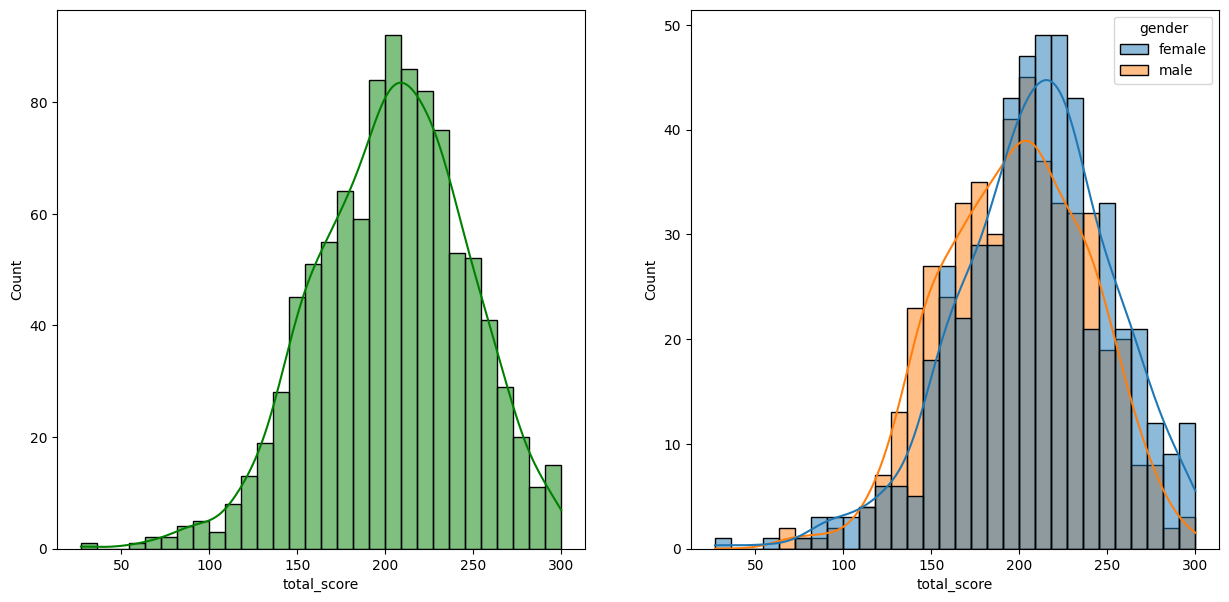

In [41]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'total_score', bins=30, kde=True, color='g', hue='gender')

<Axes: xlabel='average_score', ylabel='Count'>

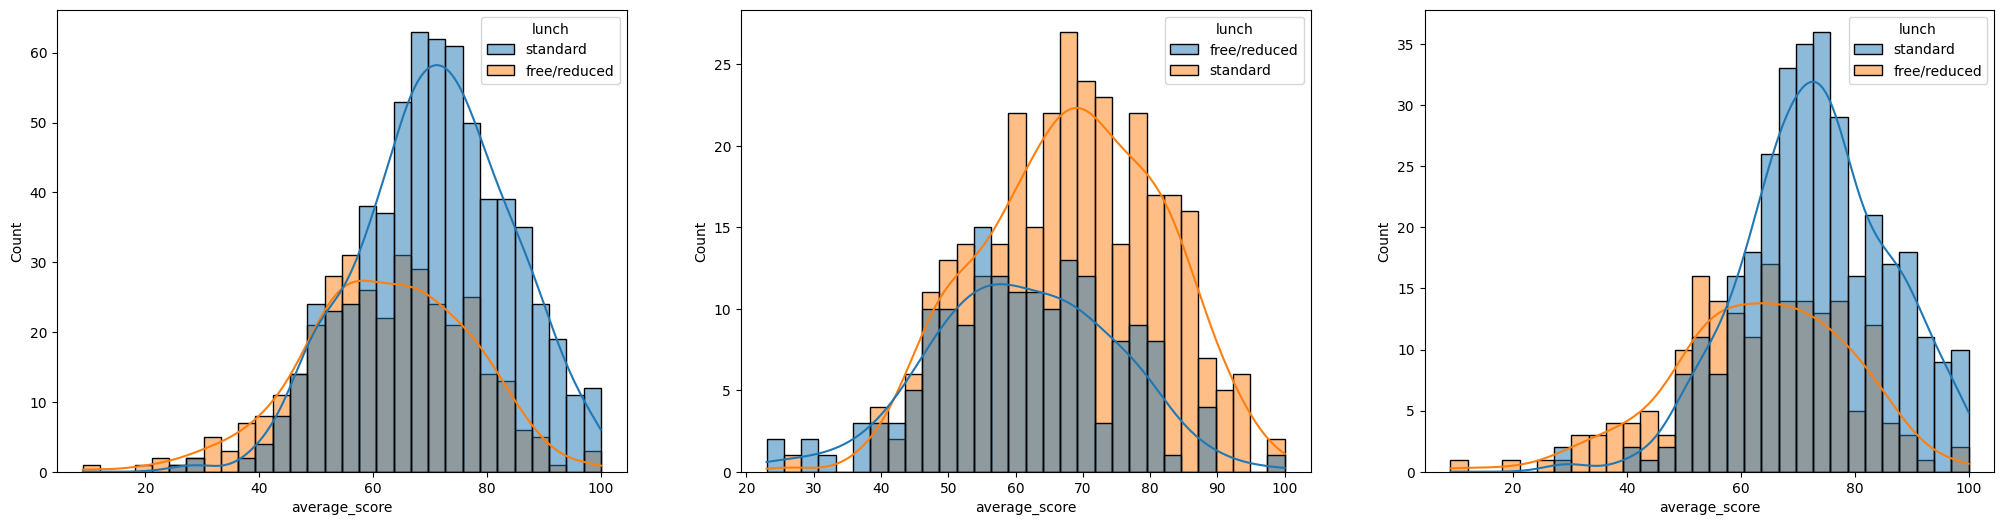

In [50]:
fig, axes = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x = 'average_score', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x = 'average_score', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x = 'average_score', bins=30, kde=True, hue='lunch')

In [51]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

<Axes: xlabel='average_score', ylabel='Count'>

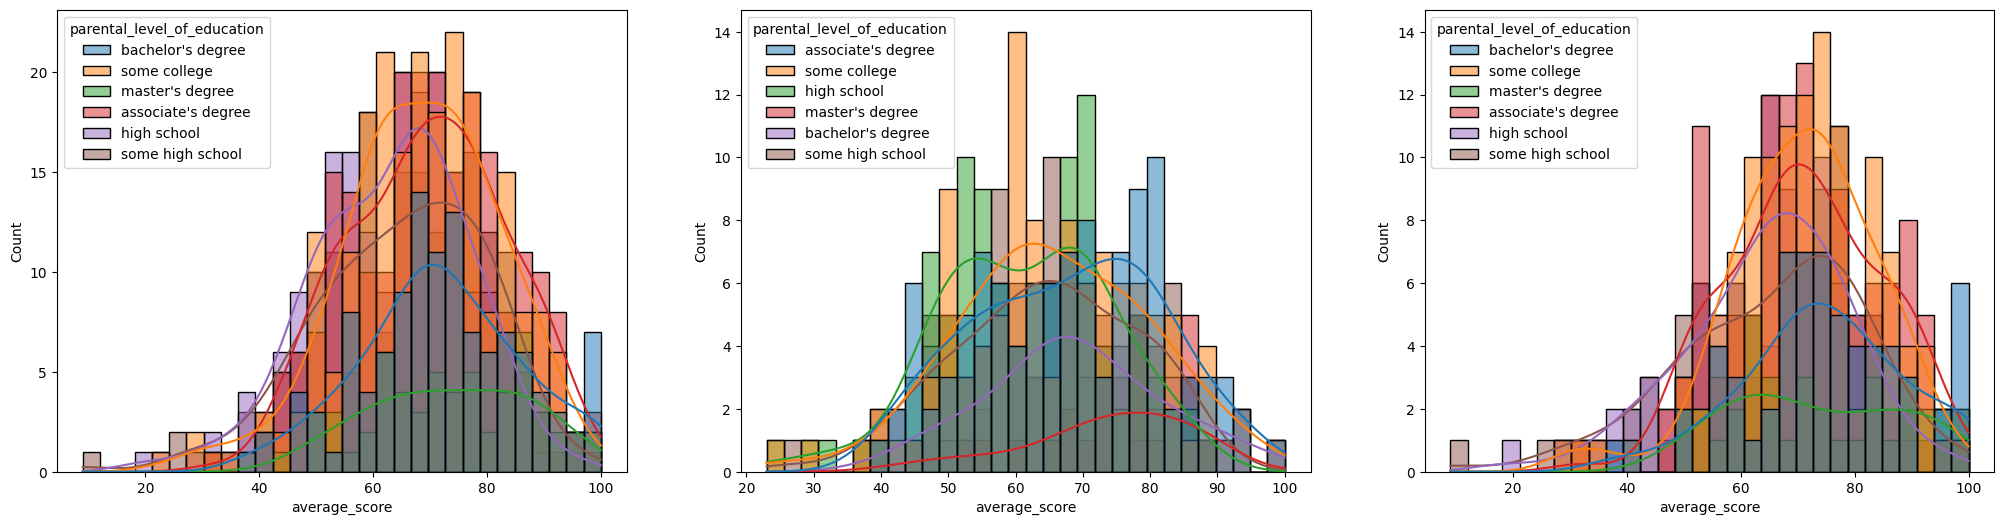

In [52]:
fig, axes = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x = 'average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x = 'average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x = 'average_score', bins=30, kde=True, hue='parental_level_of_education')

<Axes: xlabel='average_score', ylabel='Count'>

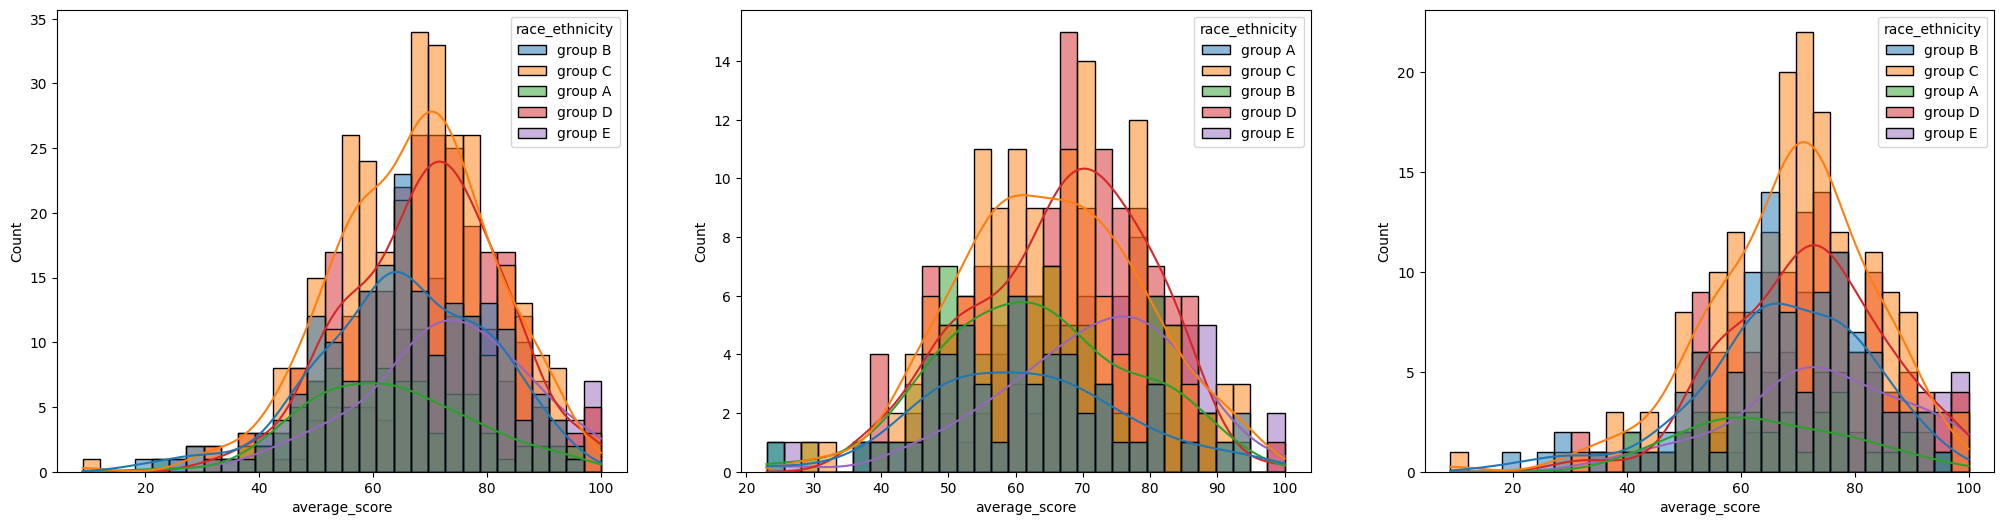

In [53]:
fig, axes = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x = 'average_score', bins=30, kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x = 'average_score', bins=30, kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x = 'average_score', bins=30, kde=True, hue='race_ethnicity')

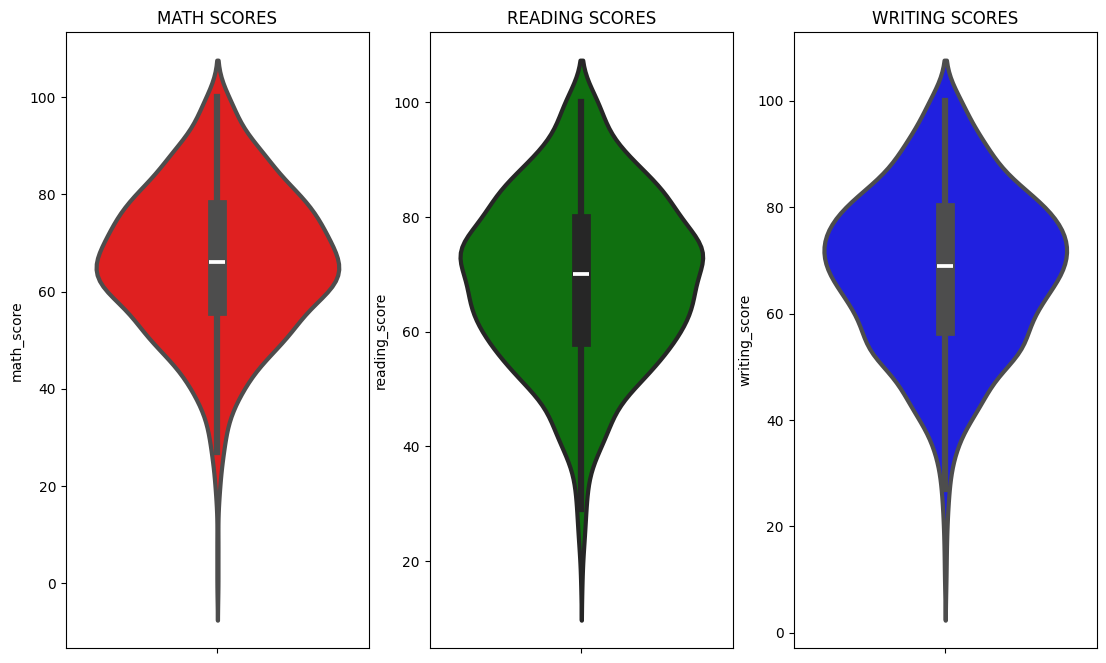

In [55]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

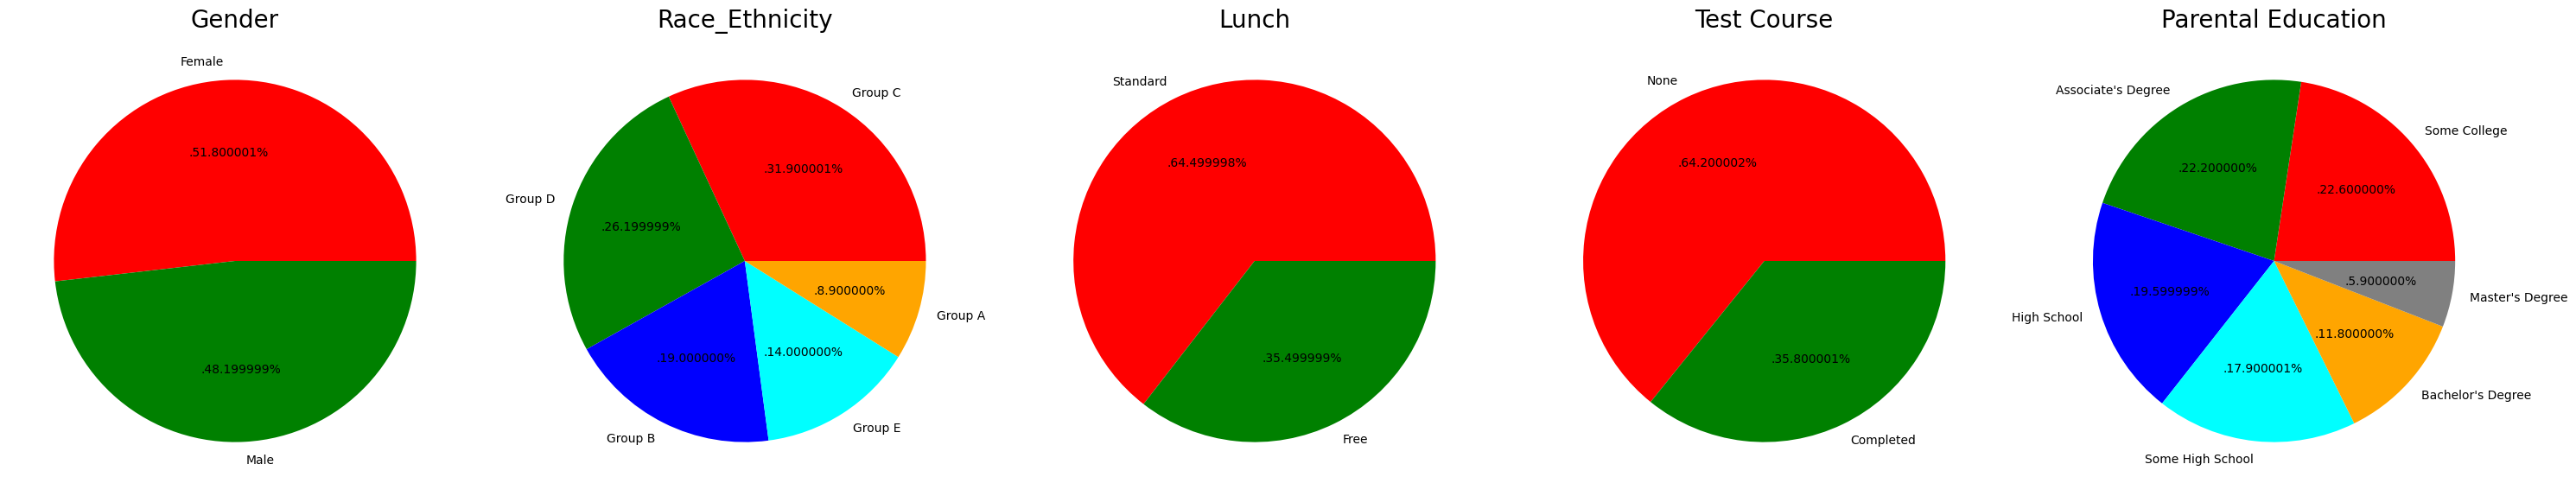

In [57]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

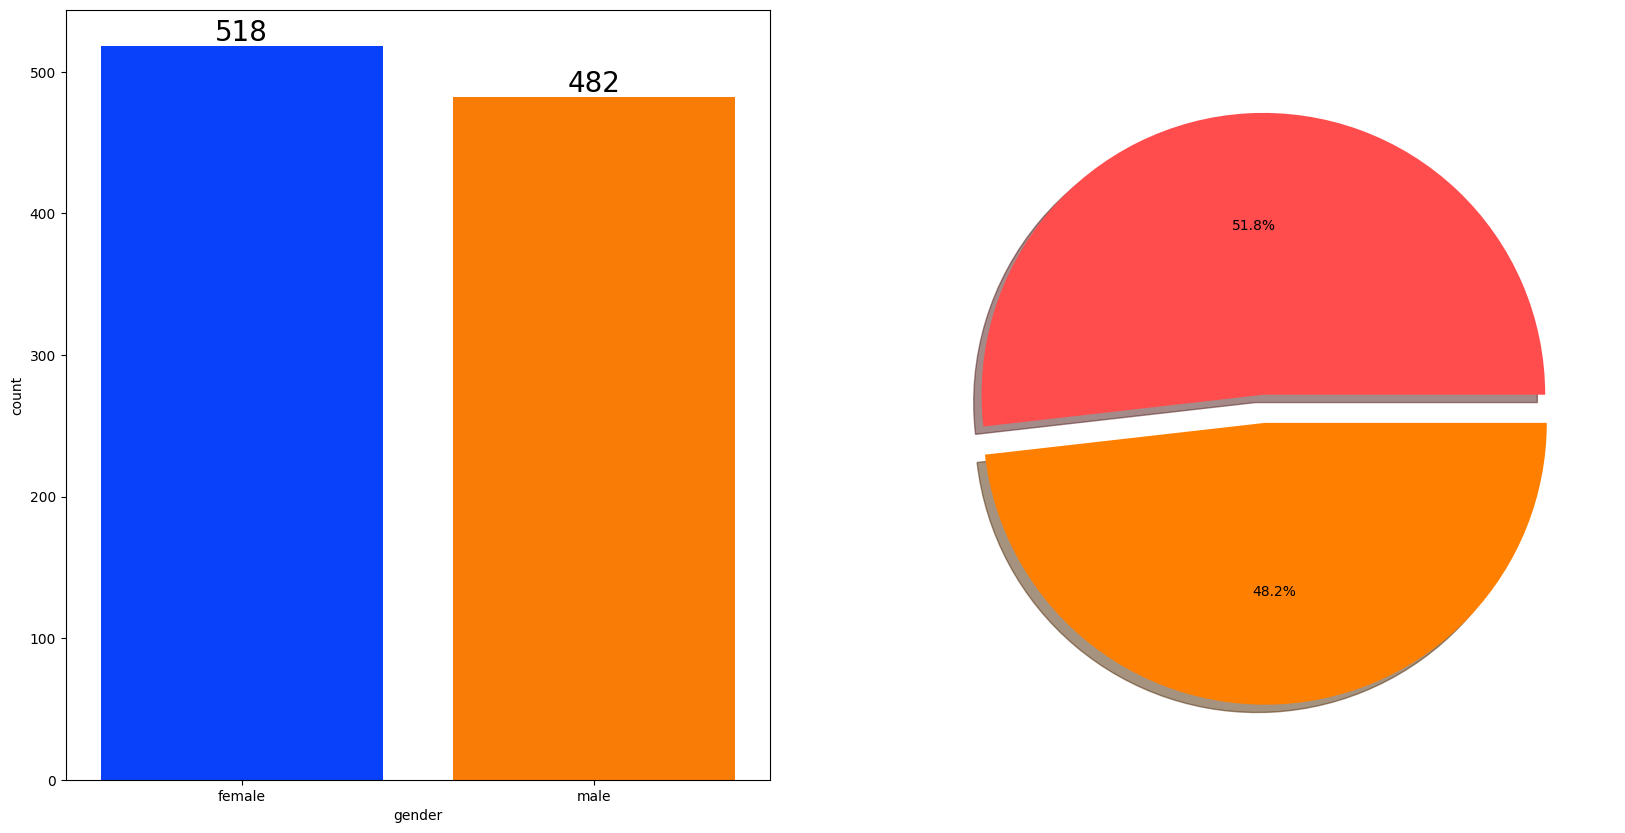

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [93]:
print(df[df.gender=='female'].average_score.mean(), df[df.gender=='male'].average_score.mean())
print(df[df.gender=='female'].math_score.mean(), df[df.gender=='male'].math_score.mean())
print(df[df.gender=='female'].reading_score.mean(), df[df.gender=='male'].reading_score.mean())
print(df[df.gender=='female'].writing_score.mean(), df[df.gender=='male'].writing_score.mean())

69.56949806949807 65.83730290456431
63.633204633204635 68.72821576763485
72.60810810810811 65.47302904564316
72.46718146718146 63.31120331950208


In [98]:
df.groupby(by='gender').mean(numeric_only=True)

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


In [99]:
df.groupby(by='race_ethnicity').mean(numeric_only=True)

,math_score,reading_score,writing_score,total_score,average_score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992135
group B,63.452632,67.352632,65.600000,196.405263,65.468579
group C,64.463950,69.103448,67.827586,201.394984,67.131567
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752000


<Axes: ylabel='race_ethnicity'>

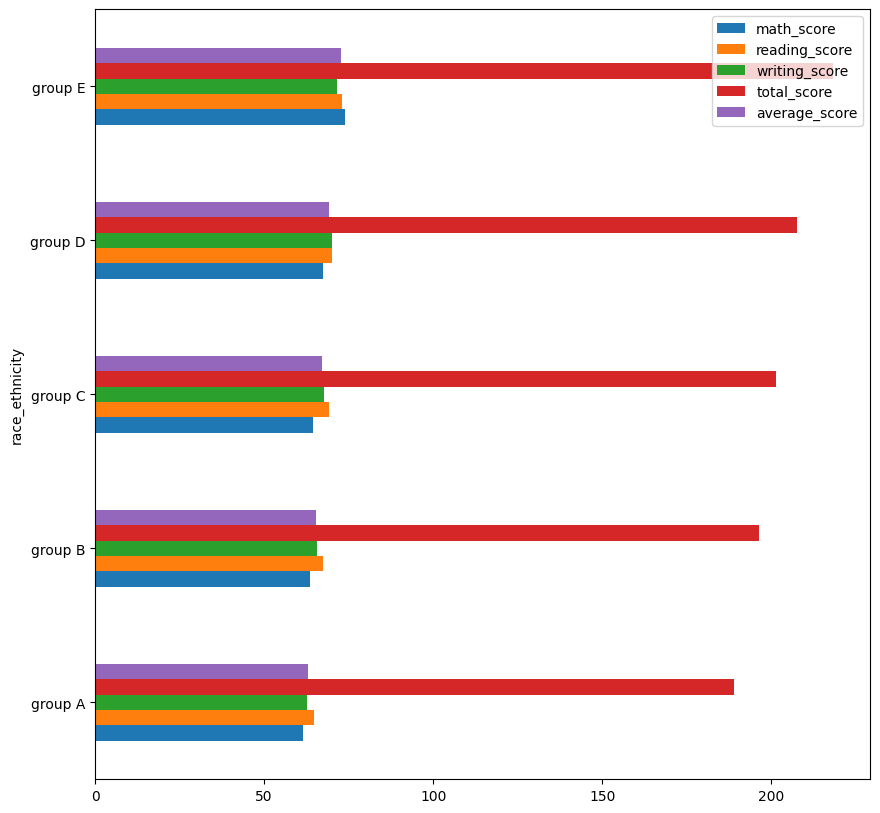

In [103]:
df.groupby(by='race_ethnicity').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))